<a href="https://colab.research.google.com/github/thiagodemelosilva/Imersao_Dados_4_Alura/blob/main/Imersao_dados_4_aula02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUÇÃO
Neste notebook uma base de dados retirada do Kaggle sobre imóveis à venda na cidade de São Paulo é utilizada pra exercitar conceitos de exploração de dados com python como:


*   Limpeza e adequação de valores para possibilitar sua análise com pandas.
*   Bibliotecas de construção de gráficos para naálise e apresentação de conclusões para outros pares.

Os desafios abaixo foram feitos como forma de exercitar estes conceitos.

#Desafio Aula 2

- Gráfico de histograma de valores dos imóveis legível e bem apresentado (alterar labels, cores, título, escala)
- Preço do metro quadrado por bairro e plotar em um gráfico significativo
- Explorar as bibliotecas de visualizações e colocar as suas conclusões
- Pesquisar uma visualização para analisar os quartis, mediana e outliers

# Preparação dos Dados
Antes de realizar qualquer desafio vamos primeiro tratar os dados de valores para que porramos processá-los matamaticamente.

In [5]:
import pandas as pd
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
df = pd.read_csv(url)
pd.options.display.float_format = '{:.2f}'.format #Floats com 2 casa decimais

In [6]:
df[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = df["Valor"].str.split(expand = True) #Strings em Valor separadas por informação (Moeda, Valor, Tipo)
df_imoveis_venda = df[df["Tipo_anuncio"].isnull()] #Filtragem para apenas imóveis a venda excluido aluguéis
df_imoveis_venda['Valor_anuncio'] = df_imoveis_venda["Valor_anuncio"].str.replace(".","").astype(float) #Tranformação dos valores de string para float
df_imoveis_venda

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1500000.00,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.00,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2300000.00,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.00,None


Este é o data frame que será base para os gráficos feitos neste notebook.

# Desafio 1
Gráfico de histograma de valores dos imóveis legível e bem apresentado (alterar labels, cores, título, escala)

A escala sugerida pelos tutores é em milhões de Reais.

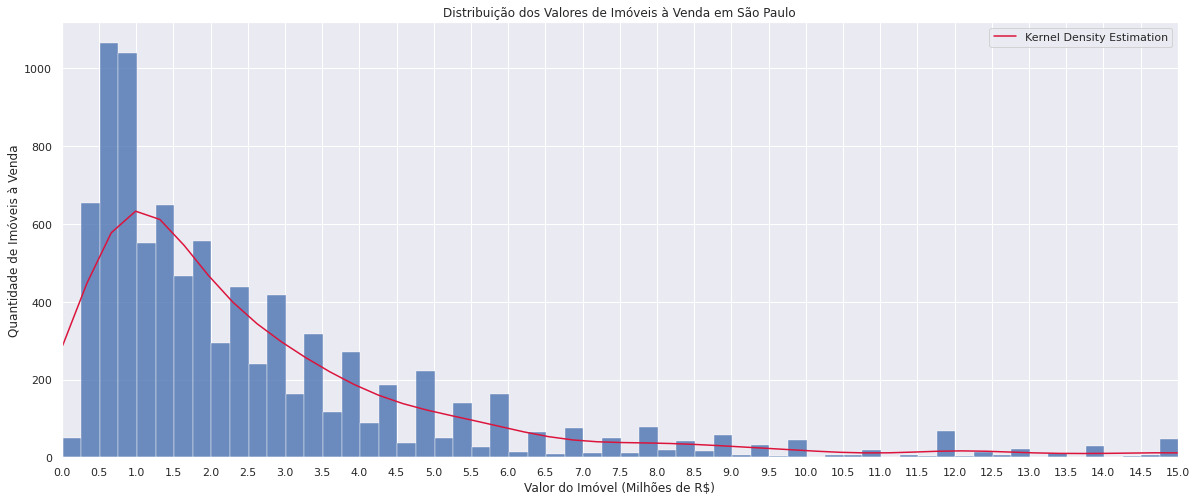

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(20, 8))
plt.title("Distribuição dos Valores de Imóveis à Venda em São Paulo")
plt.xlabel("Valor do Imóvel (Milhões de R$)")
plt.ylabel("Quantidade de Imóveis à Venda")

ax = sns.histplot(data = df_imoveis_venda, x = "Valor_anuncio", kde = True, binwidth = 250000, alpha = 0.8)
ax.lines[0].set_color('crimson')
plt.legend(["Kernel Density Estimation"]) 
plt.xlim((-50, 15000000))
plt.xticks(range(0,15100000,500000))
ticks = ax.get_xticks()*10**-6
ax.set_xticklabels(ticks)
plt.show()

#Desafio 2
Preço do metro quadrado por bairro e plotar em um gráfico significativo

In [32]:
#Determinando o valor por m² para cada bairro
df_valor_m2_bairro = pd.DataFrame(df_imoveis_venda.groupby('Bairro')['Valor_anuncio'].sum() / df_imoveis_venda.groupby('Bairro')['Metragem'].sum())
df_valor_m2_bairro.rename( columns = {0: 'R$/m2'}, inplace = True)
df_valor_m2_bairro

,R$/m2
Bairro,
Aclimação,7162.69
Alto da Boa Vista,5708.74
Alto da Lapa,6961.30
Alto da Mooca,4385.00
Alto de Pinheiros,11126.34
...,...
Vila Água Funda,4283.84
Água Branca,7065.77
Água Fria,5604.53


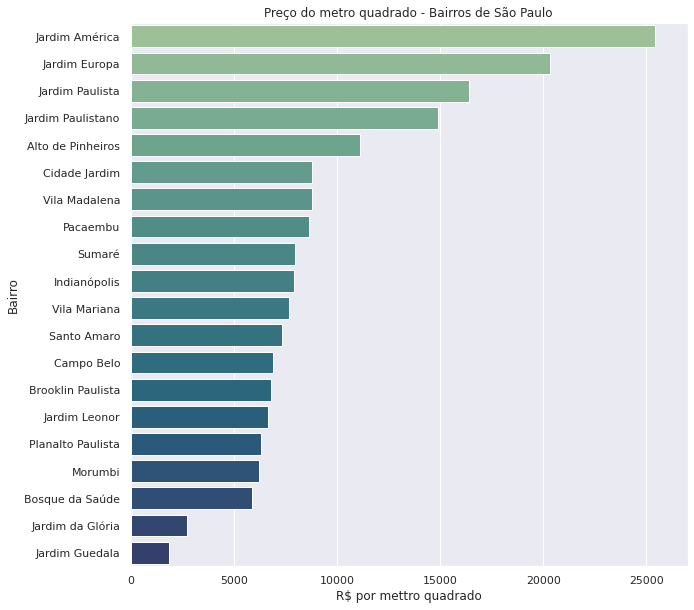

In [66]:
#Podemos colocar nossos dados em ordem e fazer um gráfico incluindo os 20 bairros mais representativos na base de dados
df_valor_m2_bairro.sort_values(by = ['R$/m2'], ascending = False, inplace = True)
top_bairros = df_imoveis_venda['Bairro'].value_counts()[:20].index

sns.set()
plt.figure(figsize = (10, 10))
ax = sns.barplot(x = 'R$/m2', y = 'Bairro', data = df_valor_m2_bairro.query('Bairro in @top_bairros'), palette = "crest")
plt.title("Preço do metro quadrado - Bairros de São Paulo")
plt.xlabel("R$ por mettro quadrado")
plt.ylabel("Bairro")
plt.xlim(-50, 27000)
plt.show()

#Defasio 3
Pesquisar uma visualização para analisar os quartis, mediana e outliers

In [ ]:
#Através do método .describe podemos ver várias estatísticas descritivas úteis dos nosso dados
df_imoveis_venda.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


Metragem            AxesSubplot(0.125,0.125;0.133621x0.755)
Quartos          AxesSubplot(0.285345,0.125;0.133621x0.755)
Banheiros         AxesSubplot(0.44569,0.125;0.133621x0.755)
Vagas            AxesSubplot(0.606034,0.125;0.133621x0.755)
Valor_anuncio    AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

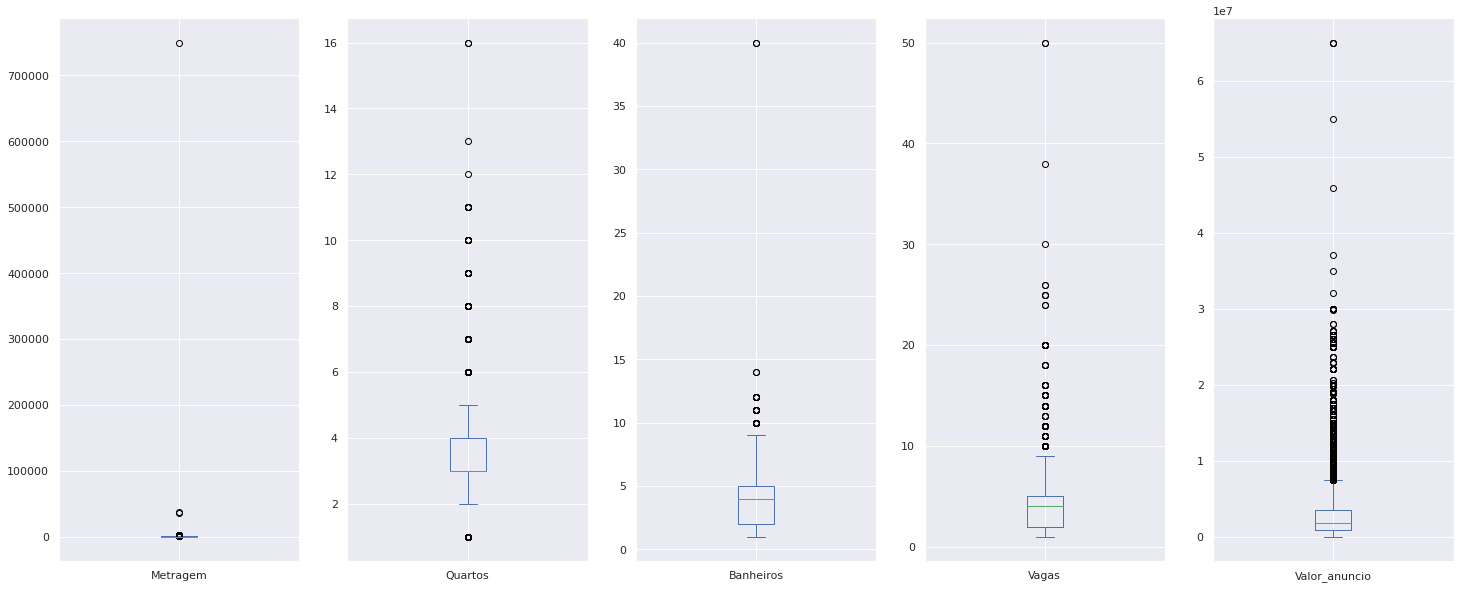

In [ ]:
#Um método gráfico interessante para observar estas mesmas varacterísticas é através de boxplots
df_imoveis_venda.plot(kind='box', subplots=True, figsize=(25,10))

Enquanto o método .describe nos dá valores estatísticos descritivos do meu grupo de datos, utilizando diagramas de caixa podemos rapidamente entender onde está posicionado os percentis e mediana dos nosso dados, além da presença de ouliers.


---

